In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

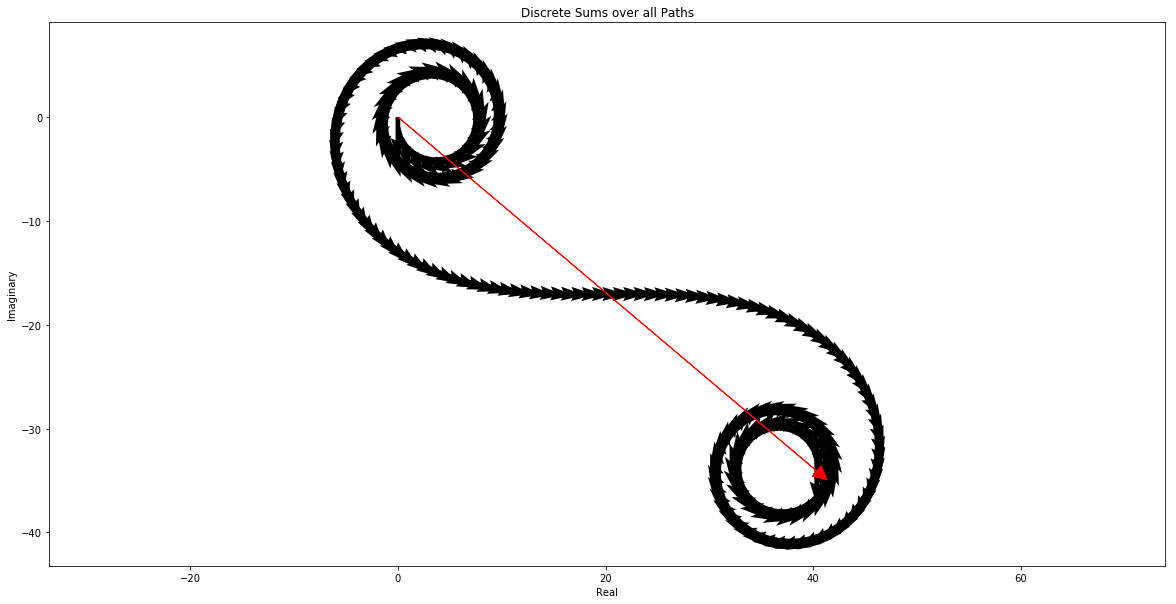

In [93]:
wavelength = 500e-9
W = 3e-3
du = 30*wavelength
u_vals = np.arange(-W/2,W/2, du)
# u_vals = np.linspace(-W/2,W/2,200)
a=1
h=1
# L total simplifies (see paper)
L = 2.75-(.5*u_vals**2)
integrand = np.exp(2*np.pi*(1/wavelength)*1j*L)
starts = np.hstack((np.array([0]), np.cumsum(integrand)[:-1]))
plt.figure(figsize=(20,10))
plt.quiver(np.real(starts), np.imag(starts), np.real(integrand), np.imag(integrand), scale=25)
plt.axis('equal')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title("Discrete Sums over all Paths")
plt.arrow(0,0,np.real(sum(integrand)), np.imag(sum(integrand)), color='r', head_width=1.35, head_length=1.31)
plt.show()


In [94]:
original_len_squared = np.real(sum(integrand))**2 + np.imag(sum(integrand))**2
print("Length Squared = %.2f" % original_len_squared)


Length Squared = 2788.81


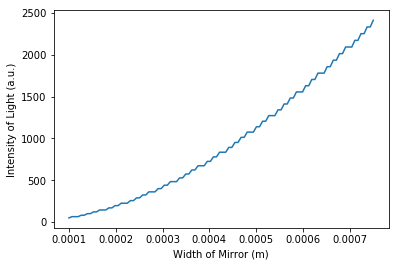

In [80]:
w_vals = np.linspace(.1e-3, .75e-3, 100)
lengths = []
for w in w_vals:
    du = 30*wavelength
    u_vals = np.arange(-w/2,w/2, du)
    L = 2.75-(.5*u_vals**2)
    integrand = np.exp(2*np.pi*(1/wavelength)*1j*L)
    len_squared = np.real(sum(integrand))**2 + np.imag(sum(integrand))**2
    lengths.append(len_squared)
plt.figure()
plt.plot(w_vals, lengths)
plt.xlabel("Width of Mirror (m)")
plt.ylabel("Intensity of Light (a.u.)")
plt.show()

In [95]:
lengths_arr = np.array(lengths)

min_w = max(w_vals[lengths_arr<original_len_squared/4])
print("Values of W Smaller than %.5f meters creates a length squared 1/4th the size" % min_w)

Values of W Smaller than 0.00039 meters creates a length squared 1/4th the size
